# Lab Segmentation 2

In [117]:
from commonfunctions import *
from skimage import io
from skimage.filters import threshold_otsu
import numpy as np
from skimage.exposure import equalize_hist

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
def scale_image_256(orig_image):        
    MIN = np.min(orig_image)
    MAX = np.max(orig_image)
    if(MAX - MIN <= 1):
        orig_image = 255 * orig_image;
    return orig_image
def binarize(image, thresh):
    image[image < thresh] = 0
    image[image > thresh] = 255
    return image

def get_threshold(orig_image):
    MIN = np.min(orig_image)
    MAX = np.max(orig_image)
#     print("max_min={}".format(MAX-MIN))
    if(MAX - MIN <= 1):
        orig_image = 255 * orig_image;
        print("transformed")
    orig_image = orig_image.astype(np.uint8)
    image_size = orig_image.shape[0]*orig_image.shape[1]
    pixel_counts = np.array([len(orig_image[orig_image == p]) for p in range(256)])
#     pixel_counts = pixel_counts / image_size
    # 3
    thresh = np.round(np.sum([p*pixel_counts[p] for p in range(256)]))/image_size
    thresh = int(thresh)
    # 4.
    #get lower weighted average 
    old_threshold = -1
    while thresh != old_threshold :
#         print("threshold:{}".format(thresh))
        part1_size = len(orig_image[orig_image < thresh])
        mu1 = np.round(np.sum([p * pixel_counts[p] for p in range(0,thresh)]))/part1_size
        # get upper weighted average
        part2_size = len(orig_image[orig_image >= thresh])
        mu2 = np.round(np.sum([p * pixel_counts[p] for p in range(thresh,256)]))/part2_size
        old_threshold = thresh
        thresh = int((mu1+mu2)/2)
#         print("mu1:{} , mu2:{}".format(mu1,mu2))
        
    return thresh
    

transformed


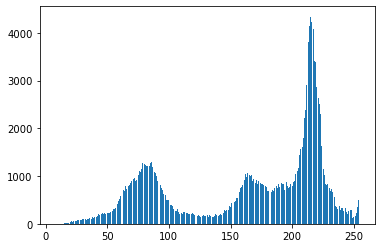

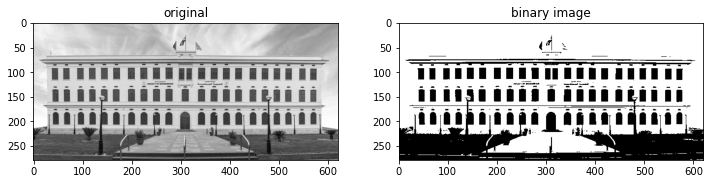

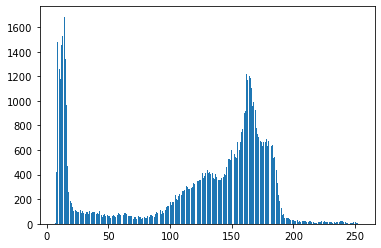

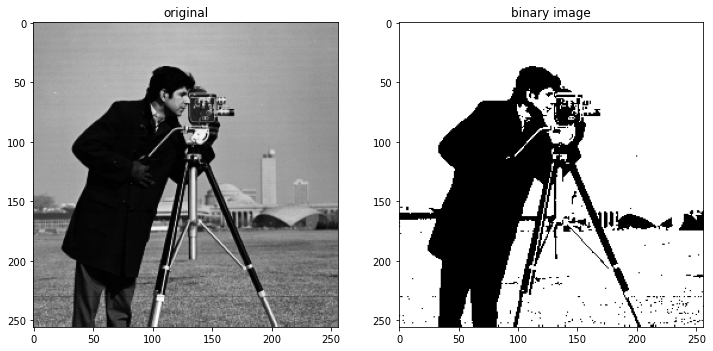

transformed


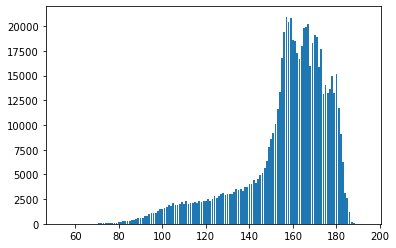

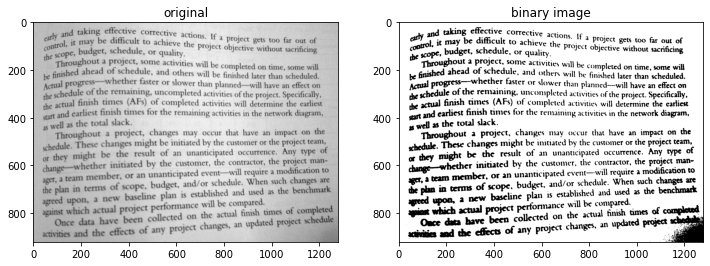

In [127]:
paths = ['cufe.png','cameraman.png', 'book1.png']
for path in paths:
    orig_image = io.imread(path,as_gray=True)
    thresh = get_threshold(orig_image)

    orig_image = scale_image_256(orig_image)
    showHist(orig_image)
#     print(thresh)
    # 5. update
    binary_image = orig_image.copy()
    binary_image[binary_image <= thresh]=0
    binary_image[binary_image > thresh]=255
    show_images([orig_image,binary_image], ["original","binary image"])

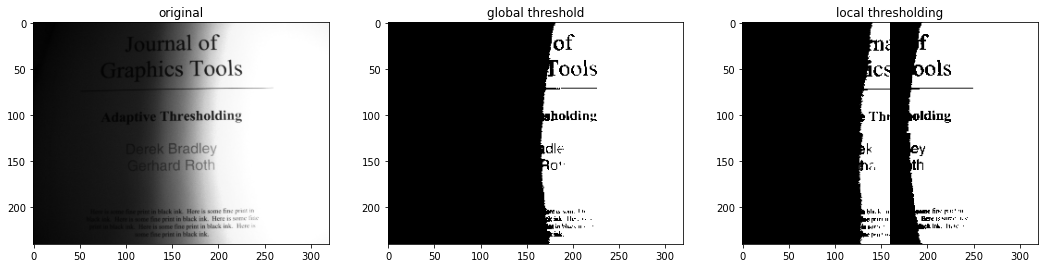

In [128]:
## improvement
book_image = io.imread('book.png',as_gray=True)
thresh = get_threshold(book_image)
book_image = scale_image_256(book_image)
book_image_local = book_image.copy()
h,w = book_image_local.shape
rows = [0,h//2]
cols = [0,w//2]

for row in rows:
    for col in cols:
        im = book_image_local[row:row+h//2,col:col+w//2]
        thresh = get_threshold(im)
        im = binarize(im,thresh)
        book_image_local[row:row+h//2,col:col+w//2] = im
book_image_global=book_image.copy()
thresh = get_threshold(book_image_global)
book_image_global=binarize(book_image_global, thresh)
show_images([book_image,book_image_global,book_image_local],["original","global threshold","local thresholding"])

transformed


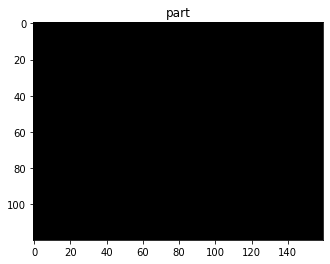

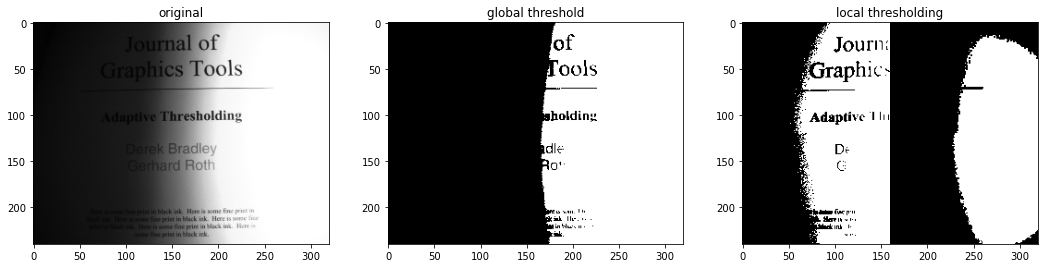

In [140]:
## improvement
book_image = io.imread('book.png',as_gray=True)
# book_image = equalize_hist(book_image)
book_image = scale_image_256(book_image)
book_image_local = book_image.copy()
h,w = book_image_local.shape
rows = [0,h//2]
cols = [0,w//2]
im = book_image_local[0:0+h//2,0:0+w//2]
im = equalize_hist(im)
thresh = get_threshold(im)
im=binarize(im,thresh)
show_images([im],['part'])

for row in rows:
    for col in cols:        
        im = book_image_local[row:row+h//2,col:col+w//2]  
        im = equalize_hist(im)
        thresh = threshold_otsu(im)
        im = binarize(im,thresh)
        book_image_local[row:row+h//2,col:col+w//2] = im
book_image_global=book_image.copy()
thresh = get_threshold(book_image_global)
book_image_global=binarize(book_image_global, thresh)
show_images([book_image,book_image_global,book_image_local],["original","global threshold","local thresholding"])